In [1]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#dir(pymongo)

In [3]:
#calling client for mongo database
myclient = pymongo.MongoClient("mongodb://localhost:27017")

In [4]:
myclient

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [5]:
#creating a mongo database
mydb = myclient["loaninfo"]

In [6]:
mydb

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'loaninfo')

In [7]:
#dir(mydb)

In [8]:
#creating the 1st collection/table
mycol = mydb["LoanTest"]

In [9]:
mycol

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'loaninfo'), 'LoanTest')

In [10]:
#creating 2nd collection/table
collection = mydb["LoanTrain"]

In [11]:
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'loaninfo'), 'LoanTrain')

In [12]:
#load data from csv file to the mongodb tables
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
df= train
data = df.to_dict('records')

x = mycol.insert_many(data, ordered=False)

In [13]:
#x =mycol.find_one()

In [14]:
dataframe=test
data = dataframe.to_dict('records')

y = collection.insert_many(data, ordered=False)

In [15]:
#y=mycol.find_one()

In [16]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [17]:
#check for missing values anyone with more than 0 has missing values
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
#filling in missing values fro train
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [19]:
#filling missing values for test
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [20]:
#rechecking for missing values 
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

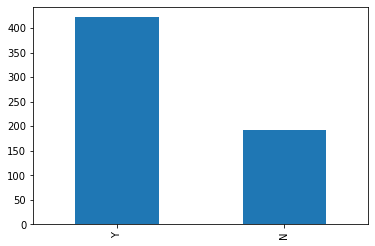

In [21]:
#loan status bar for training data
train['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:>

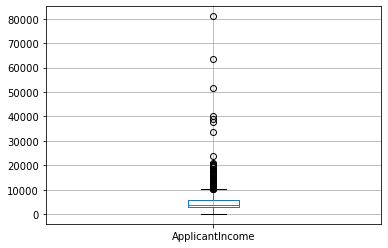

In [22]:
#visualizing using the boxplot to check for the outliers
train.boxplot(column ='ApplicantIncome')

<AxesSubplot:>

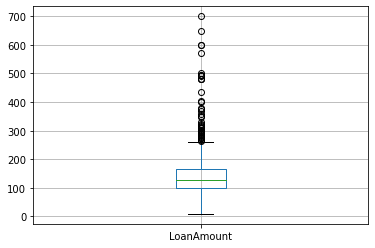

In [23]:
train.boxplot(column ='LoanAmount')

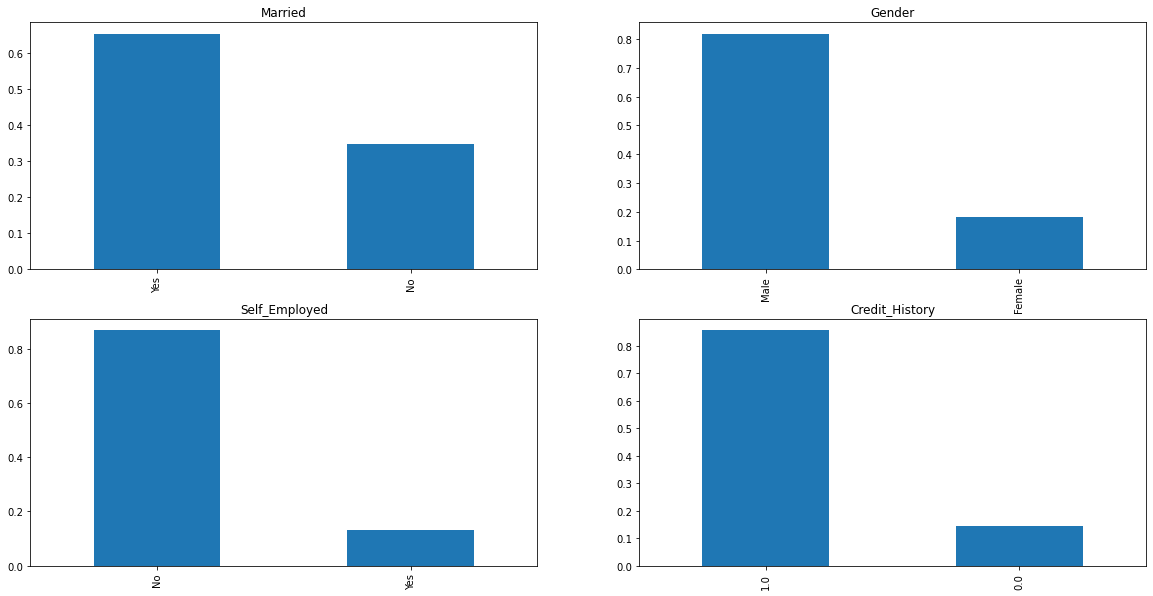

In [24]:
#variables visual representation
plt.figure(1)
plt.subplot(221)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Married")
plt.subplot(222)
train['Gender'].value_counts(normalize=True).plot.bar(title="Gender")
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self_Employed")
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title="Credit_History")
plt.show()

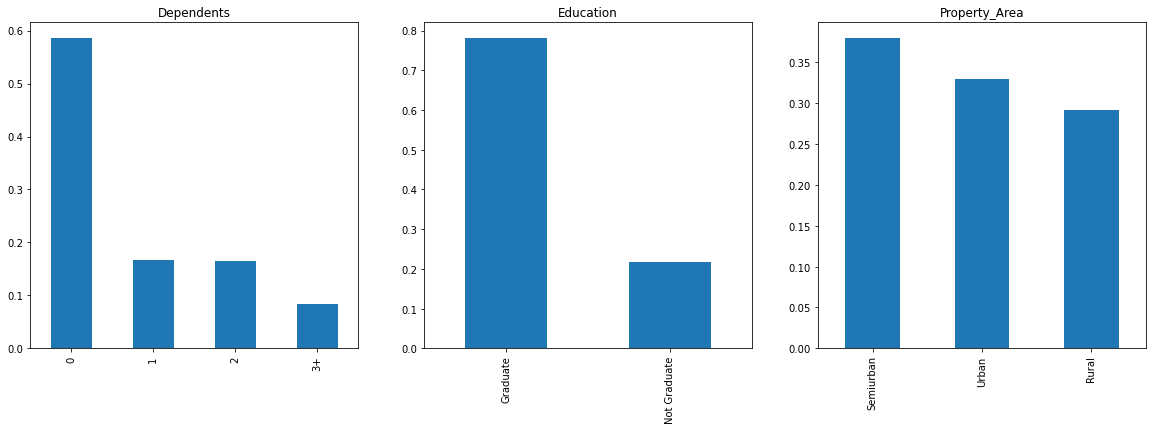

In [25]:
# ordinal variables
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,6),title="Dependents")
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title="Education")
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title="Property_Area")

plt.show()

<AxesSubplot:xlabel='Married'>

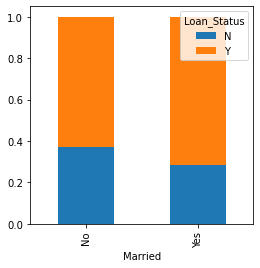

In [26]:
#
married= pd.crosstab(train['Married'],train['Loan_Status'])
married.div(married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))


<AxesSubplot:xlabel='Gender'>

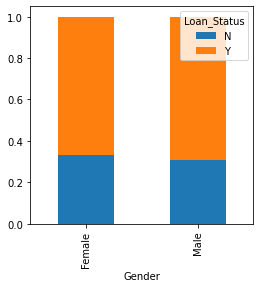

In [27]:
gender= pd.crosstab(train['Gender'],train['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Dependents'>

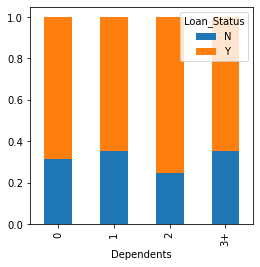

In [28]:
dependents= pd.crosstab(train['Dependents'],train['Loan_Status'])
dependents.div(dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

In [29]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Education'>

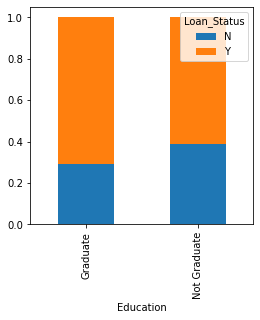

In [30]:
education= pd.crosstab(train['Education'],train['Loan_Status'])
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

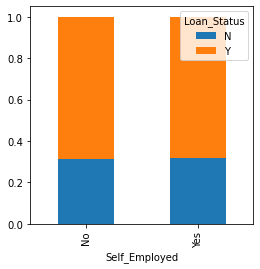

In [31]:

self= pd.crosstab(train['Self_Employed'],train['Loan_Status'])
self.div(self.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Self_Employed: 

In [32]:
#normalizing the loan amount column
train['LoanAmount_log']=np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [33]:
#drop loan_id
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [34]:
#turning categorical data into 0 and 1s
X= pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [35]:
# spliting train 
from sklearn.model_selection import train_test_split
x_train, x_vl, y_train, y_vl= train_test_split(X,y, test_size=0.3,random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
#fitting our data
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [38]:
#predict 
pred= model.predict(x_vl)
pred


array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [39]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_vl,pred)

0.7513513513513513

In [40]:
#test data
pred_test= model.predict(test)
pred_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [41]:
#import random forestmodel
from sklearn.ensemble import RandomForestClassifier
#instantiate the model with 1000 decision trees and random states(hyperparameters)
rf= RandomForestClassifier(n_estimators=1000,random_state=42)
#train data
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [42]:
rfpred=rf.predict(x_vl)
rfpred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y

In [43]:
accuracy_score(rfpred,y_vl)

0.772972972972973

In [44]:
pred_test=rf.predict(test)
pred_test

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

<AxesSubplot:>

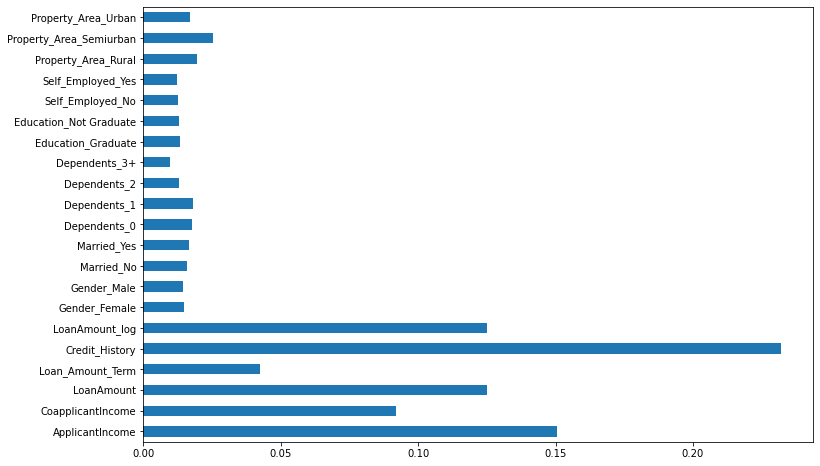

In [45]:
#feature importance
important= pd.Series(rf.feature_importances_,index=X.columns)
important.plot(kind='barh',figsize=(12,8))

In [46]:
#training for random forest
X=train[['ApplicantIncome', 'CoapplicantIncome','Credit_History', 'LoanAmount_log']] 
                                     
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

rf.fit(X_train,y_train)
k=rf.predict(X_test)
accuracy_score(k,y_test)

0.8108108108108109

In [47]:
# retraining for logistic regression
X=train[['ApplicantIncome', 'CoapplicantIncome','Credit_History', 'LoanAmount_log']] 
                                     
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

 

model.fit(X_train,y_train)
k=model.predict(X_test)

 

accuracy_score(k,y_test)

0.8378378378378378

<AxesSubplot:xlabel='Credit_History'>

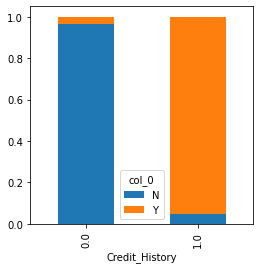

In [48]:
test_loan= pd.crosstab(test['Credit_History'],pred_test)
test_loan.div(test_loan.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Loan_Amount_Term'>

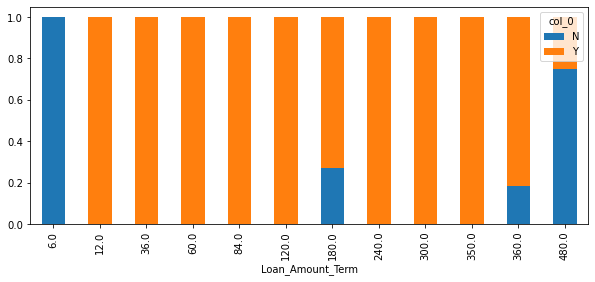

In [49]:
test_loan_amount_term= pd.crosstab(test['Loan_Amount_Term'],pred_test)
test_loan_amount_term.div(test_loan_amount_term.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,4))

In [50]:
#test_gender= pd.crosstab(test['LoanAmount'],pred_test)
#test_gender.div(test_gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(100,4))

Allowing new users to apply for a loan using our model to determine if they are loan eligible or not

In [51]:
 def details():
    global Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
    
    Loan_ID = int(input("Enter the Loan_ID: ")) 
    Gender = input("Enter your Gender: ")
    Married = input("Enter your Marital status yes/no: ")
    Dependents = input("Enter your Dependents: ")
    Education = input("Are you a Graduate/Not: ")
    Self_Employed = input("Are you  Self_Employed Yes/No : ")
    ApplicantIncome = input("Enter your Income: ")
    CoapplicantIncome = input("Enter your Coapplicantincome : ")
    Loan_Amount = input("Enter the Loan_Amount: ")
    Loan_Amount_Term = input("Enter the Loan_Amount_Term : ")
    Credit_History = input("Enter your Credit_History 0/1 : ")
    Property_Area = input("Enter your  Property_Area Urban/Semi_Urban/Rural: ")
    #return (Loan_ID)

    

In [52]:
def main():
    runtime = 1
    print('Welcome to Loan Automation System')
    while runtime:
        checker = int(input('1 Enter the required details: 2 to quit: '))
        
        if checker == 1:
                details()
        else:
            print('Invalid details, try again')
        
            
            main()  
        print('========================')
        
        break
    
main()

Welcome to Loan Automation System
1 Enter the required details: 2 to quit: 1
Enter the Loan_ID: 234234
Enter your Gender: male
Enter your Marital status yes/no: no
Enter your Dependents: 2
Are you a Graduate/Not: not
Are you  Self_Employed Yes/No : yes
Enter your Income: 4500000
Enter your Coapplicantincome : 342786
Enter the Loan_Amount: 345278
Enter the Loan_Amount_Term : 4
Enter your Credit_History 0/1 : 1
Enter your  Property_Area Urban/Semi_Urban/Rural: rural


In [53]:
Loan_ID

234234

In [54]:
Newdata = {"Loan_ID": Loan_ID,"Gender":Gender,"Married":Married,"Dependents":Dependents,"Education":Education,"Self_Employed":Self_Employed,"ApplicantIncome":ApplicantIncome, "CoapplicantIncome":CoapplicantIncome, "Loan_Amount":Loan_Amount,"Loan_Amount_Term":Loan_Amount_Term,"Credit_History":Credit_History,"Property_Area":"Property_Area"}

x = collection.insert_one(Newdata)
 

In [55]:
y = collection.find_one()

y

{'_id': ObjectId('60e2042b3787205cf1b67f71'),
 'Loan_ID': 'LP001015',
 'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '0',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 5720,
 'CoapplicantIncome': 0,
 'LoanAmount': 110.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Urban'}

In [56]:
Inputdf = pd.DataFrame(y, index=[0])
 

Inputtrain=Inputdf.drop('_id',axis=1) 

Inputtrain


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [57]:
Inputtest=Inputtrain.drop('Loan_ID',axis=1) 
Inputtest

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [58]:
#turning categorical data into 0 and 1s
X=pd.get_dummies(Inputtest)
X


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Education_Graduate,Self_Employed_No,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,1,1,1,1


In [59]:
Y=X[['ApplicantIncome', 'CoapplicantIncome','Credit_History', 'LoanAmount']] 

In [60]:
InputPred = model.predict(Y)

InputPred

array(['N'], dtype=object)

In [61]:
#Print the prediction results
print("ARE YOU ELLIGIBLE FOR THE LOAN?",InputPred[0])

ARE YOU ELLIGIBLE FOR THE LOAN? N
